In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


## **DATA DESCRIPTION**
PRODUCT <br/>

AGE - age of the borrower<br/>

AREA - residential area ('County capital' 'Urban area' 'Rural area' 'Missing')<br/>

RESIDENTIAL PLACE - housing situation ('Owner without mortgage' 'Living with family' 'Owner with mortgage'
'Rental' 'Other')<br/>

EDUCATION - education level ('University' 'Post-graduate' 'High school' 'Missing'
'Post-secondary school' 'Other' 'College' 'Vocational school'
'Middle school' 'Primary school')<br/>

MARITAL STATUS - marital status ('married' 'divorced' 'single' 'widow')<br/>

HOUSEHOLD MEMBERS - number of people in the household<br/>

NO OF DEPENDENTS - number of dependents of the client<br/>

INCOME - income ($/month ?)<br/>

WORK SENIORITY - work experience<br/>

BUSINESS AGE - business experience (if self-employed)<br/>

ECONOMIC SECTOR - sector in which the borrower works<br/>

EMPLOYEE NO - number of employees<br/>

LENGTH RELATIONSHIP WITH CLIENT - duration of the business relationship with the client<br/>

DEBIT CARD - whether the client has a debit card<br/>

CURRENT ACCOUNT - <br/>

SAVING ACCOUNT - whether the client has a savings account<br/>

SALARY ACCOUNT - <br/>

FOREIGN ACCOUNT - whether the client has a foreign currency account<br/>

FINALIZED LOAN - whether the client has repaid the loan<br/>

DEPOSIT - <br/>

PENSION FUNDS - <br/>

**DEFAULT FLAG** - whether the client has payment arrears (**1 - yes, 0 - no**)<br/>



In [14]:
df = pd.read_csv("consumer-loans-data/orig_train.csv")
df.head()

,PRODUCT,AGE,AREA,RESIDENTIAL_PLACE,EDUCATION,MARITAL_STATUS,HOUSEHOLD_MEMBERS,NO_OF_DEPENDENTS,INCOME,WORK_SENIORITY,...,LENGTH_RELATIONSHIP_WITH_CLIENT,DEBIT_CARD,CURRENT_ACCOUNT,SAVING_ACCOUNT,SALARY_ACCOUNT,FOREIGN_ACCOUNT,FINALIZED_LOAN,DEPOSIT,PENSION_FUNDS,DEFAULT_FLAG
0,C,65,County capital,Owner without mortgage,University,married,2,0,1245.0,5,...,1,0,0,0,0,0,0,0,0,0
1,C,64,County capital,Owner without mortgage,University,married,2,0,1380.0,5,...,8,0,0,0,0,0,0,0,0,0
2,F,30,Urban area,Living with family,University,married,2,0,1131.0,2,...,1,1,1,0,0,0,0,0,0,0
3,C,39,County capital,Owner without mortgage,Post-graduate,divorced,1,0,1730.0,9,...,2,0,0,0,0,0,0,0,0,0
4,B,38,County capital,Owner without mortgage,Highschool,single,1,0,1189.0,5,...,1,1,1,0,0,0,0,0,0,0


## **Numerical data**

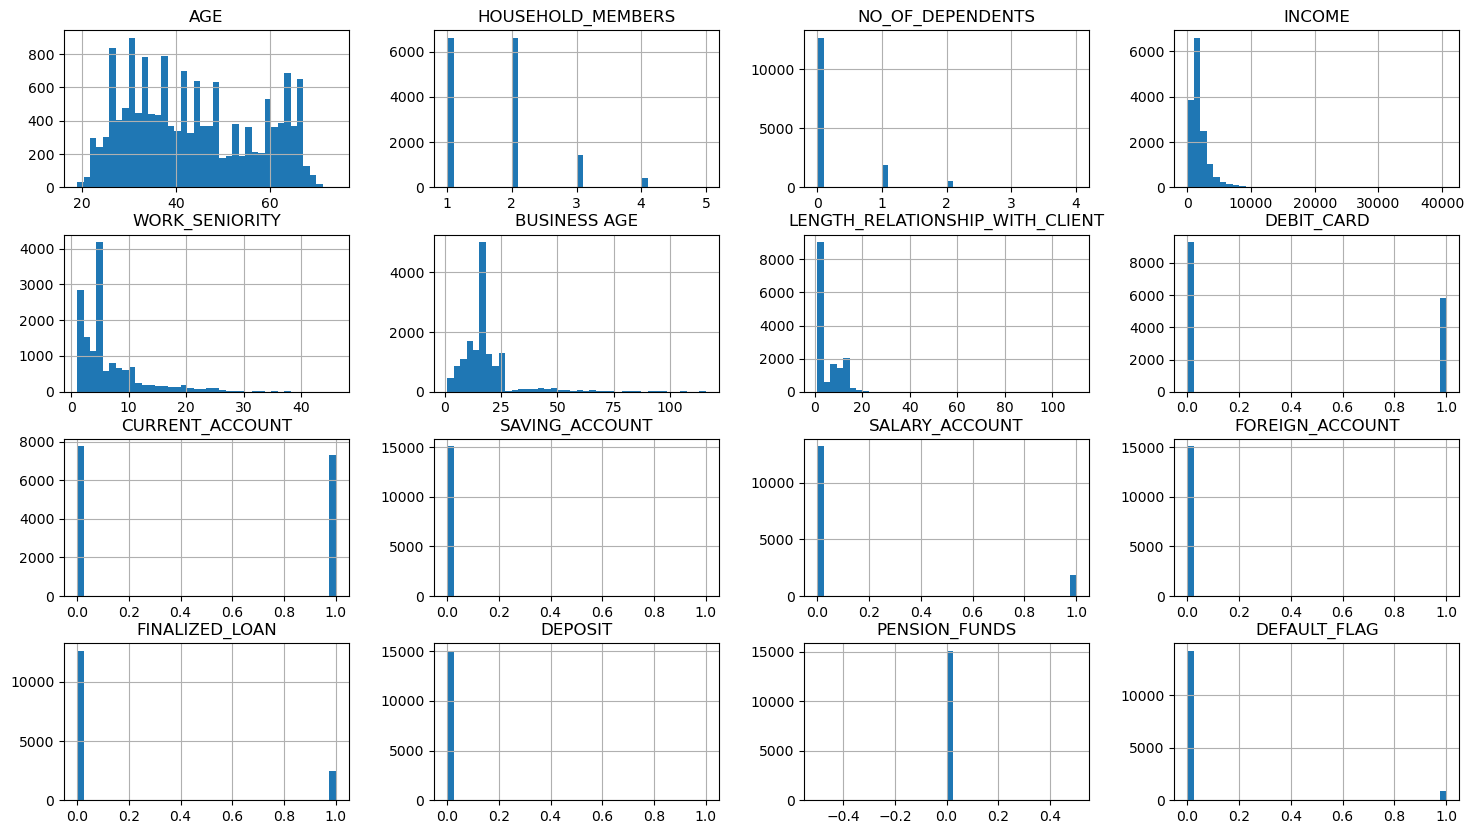

In [15]:
numeric_data = df.select_dtypes(include=["int64", "float64"])
numeric_data.hist(bins = 40, figsize = (18, 10));

In [16]:
df.describe()

,AGE,HOUSEHOLD_MEMBERS,NO_OF_DEPENDENTS,INCOME,WORK_SENIORITY,BUSINESS AGE,LENGTH_RELATIONSHIP_WITH_CLIENT,DEBIT_CARD,CURRENT_ACCOUNT,SAVING_ACCOUNT,SALARY_ACCOUNT,FOREIGN_ACCOUNT,FINALIZED_LOAN,DEPOSIT,PENSION_FUNDS,DEFAULT_FLAG
count,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.000000,15097.0,15097.000000
mean,43.584553,1.717229,0.199510,1958.071916,6.647347,17.938001,4.996556,0.384116,0.485461,0.000397,0.123203,0.000132,0.164205,0.003709,0.0,0.057230
std,13.460964,0.759843,0.493135,1772.153274,5.647763,12.477914,4.900952,0.486402,0.499805,0.019932,0.328681,0.011509,0.370474,0.060793,0.0,0.232289
min,19.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,32.000000,1.000000,0.000000,1007.420000,3.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,42.000000,2.000000,0.000000,1426.495000,5.000000,16.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,56.000000,2.000000,0.000000,2290.000000,8.000000,21.000000,10.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
max,74.000000,5.000000,4.000000,40621.600000,46.000000,116.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


In [17]:
# dropping unnecessary data 
df = df.drop(["PENSION_FUNDS", "DEPOSIT", "FOREIGN_ACCOUNT", "SAVING_ACCOUNT"], axis = 1)
numeric_data = numeric_data.drop(["PENSION_FUNDS", "DEPOSIT", "FOREIGN_ACCOUNT", "SAVING_ACCOUNT"], axis = 1)
df.head()

,PRODUCT,AGE,AREA,RESIDENTIAL_PLACE,EDUCATION,MARITAL_STATUS,HOUSEHOLD_MEMBERS,NO_OF_DEPENDENTS,INCOME,WORK_SENIORITY,BUSINESS AGE,ECONOMIC_SECTOR,EMPLOYEE_NO,LENGTH_RELATIONSHIP_WITH_CLIENT,DEBIT_CARD,CURRENT_ACCOUNT,SALARY_ACCOUNT,FINALIZED_LOAN,DEFAULT_FLAG
0,C,65,County capital,Owner without mortgage,University,married,2,0,1245.0,5,16,Missing,Missing,1,0,0,0,0,0
1,C,64,County capital,Owner without mortgage,University,married,2,0,1380.0,5,16,Missing,Missing,8,0,0,0,0,0
2,F,30,Urban area,Living with family,University,married,2,0,1131.0,2,6,Other,> 1.000,1,1,1,0,0,0
3,C,39,County capital,Owner without mortgage,Post-graduate,divorced,1,0,1730.0,9,13,Education,between 11-20,2,0,0,0,0,0
4,B,38,County capital,Owner without mortgage,Highschool,single,1,0,1189.0,5,16,Missing,Missing,1,1,1,0,0,0


<Axes: >

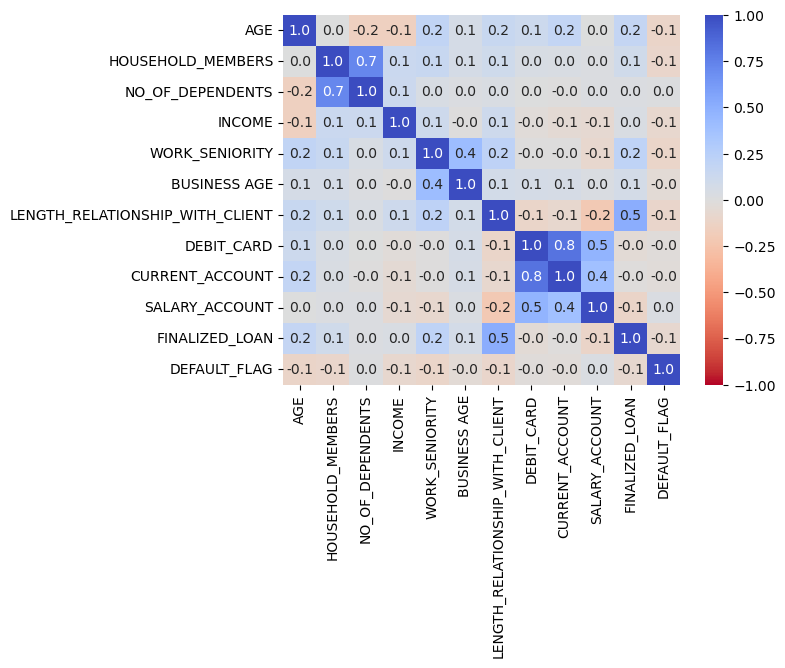

In [18]:
sns.heatmap(numeric_data.corr(), annot = True, cmap = "coolwarm_r", fmt = ".1f", center = 0, vmin = -1, vmax = 1)

/Users/julia/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


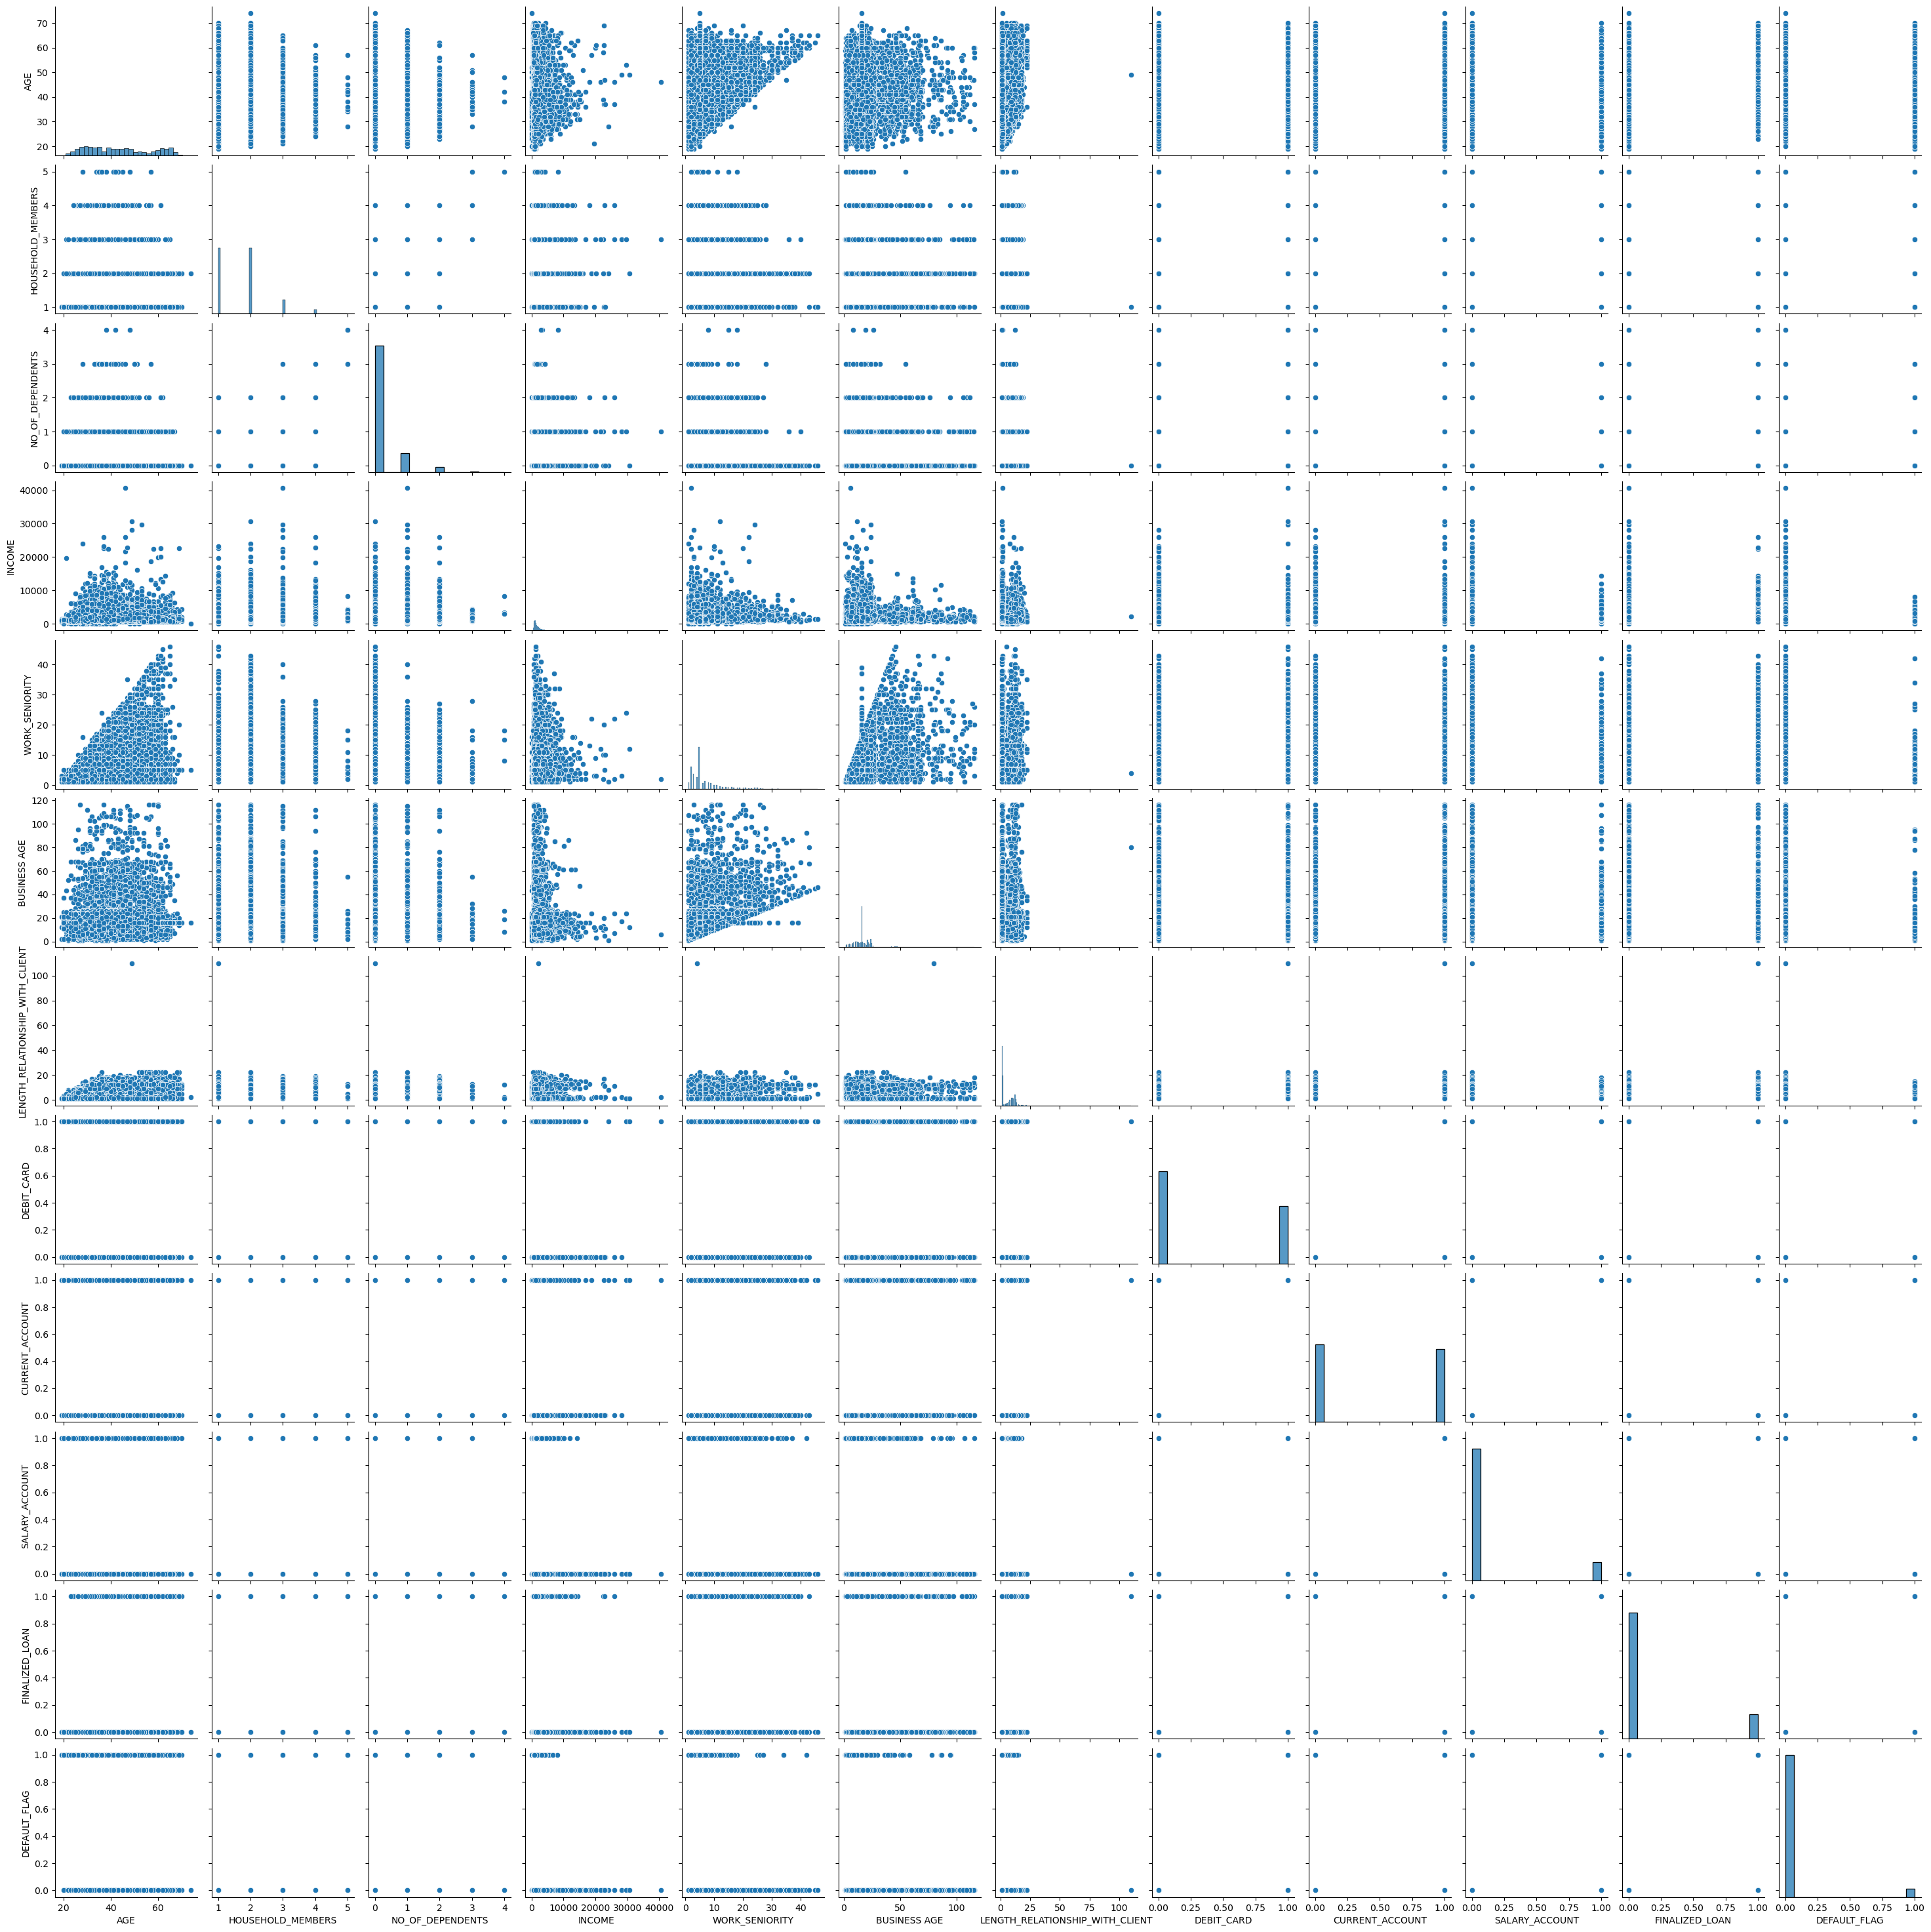

In [8]:
sns.pairplot(numeric_data, kind="scatter")
plt.show()

## **Outliers**

### LENGTH_RELATIONSHIP_WITH_CLIENT

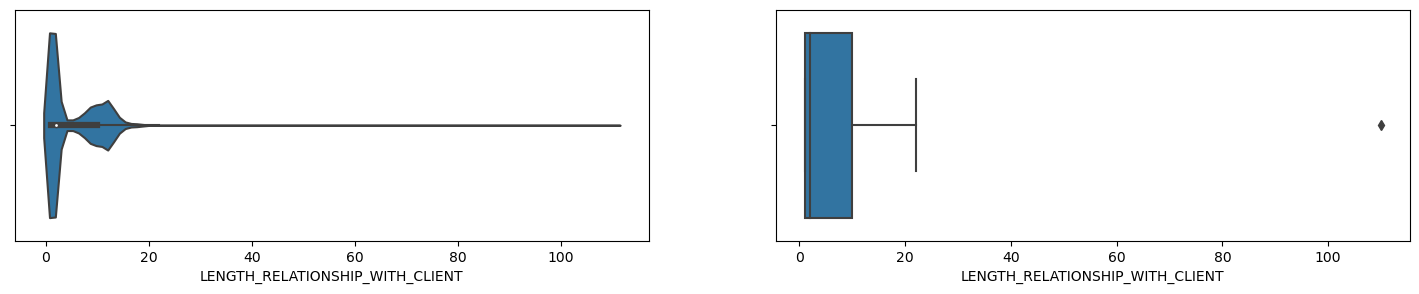

In [7]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 3))

sns.violinplot(x = df["LENGTH_RELATIONSHIP_WITH_CLIENT"], ax = axes[0])
sns.boxplot(x = df["LENGTH_RELATIONSHIP_WITH_CLIENT"], ax = axes[1])

plt.show()

In [8]:
z = np.abs(stats.zscore(df["LENGTH_RELATIONSHIP_WITH_CLIENT"]))
outliers = df[z > 3.5]
len(outliers)

1

### WORK_SENIORITY

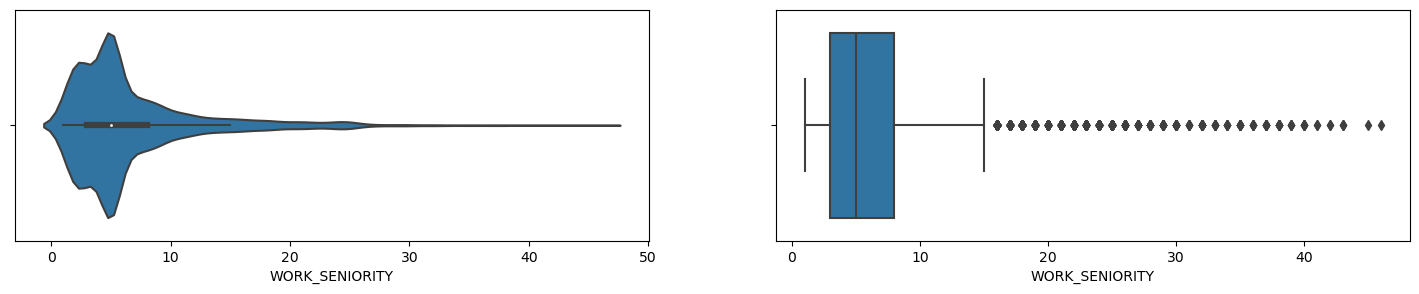

In [9]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 3))

sns.violinplot(x = df["WORK_SENIORITY"], ax = axes[0])
sns.boxplot(x = df["WORK_SENIORITY"], ax = axes[1])

plt.show()

In [10]:
z = np.abs(stats.zscore(df["WORK_SENIORITY"]))
outliers = df[z > 6]
len(outliers)

9

## **Categorical variables**

In [11]:
for col in df.select_dtypes(exclude=["int64", "float64"]).columns:
    print(col)

PRODUCT
AREA
RESIDENTIAL_PLACE
EDUCATION
MARITAL_STATUS
ECONOMIC_SECTOR
EMPLOYEE_NO


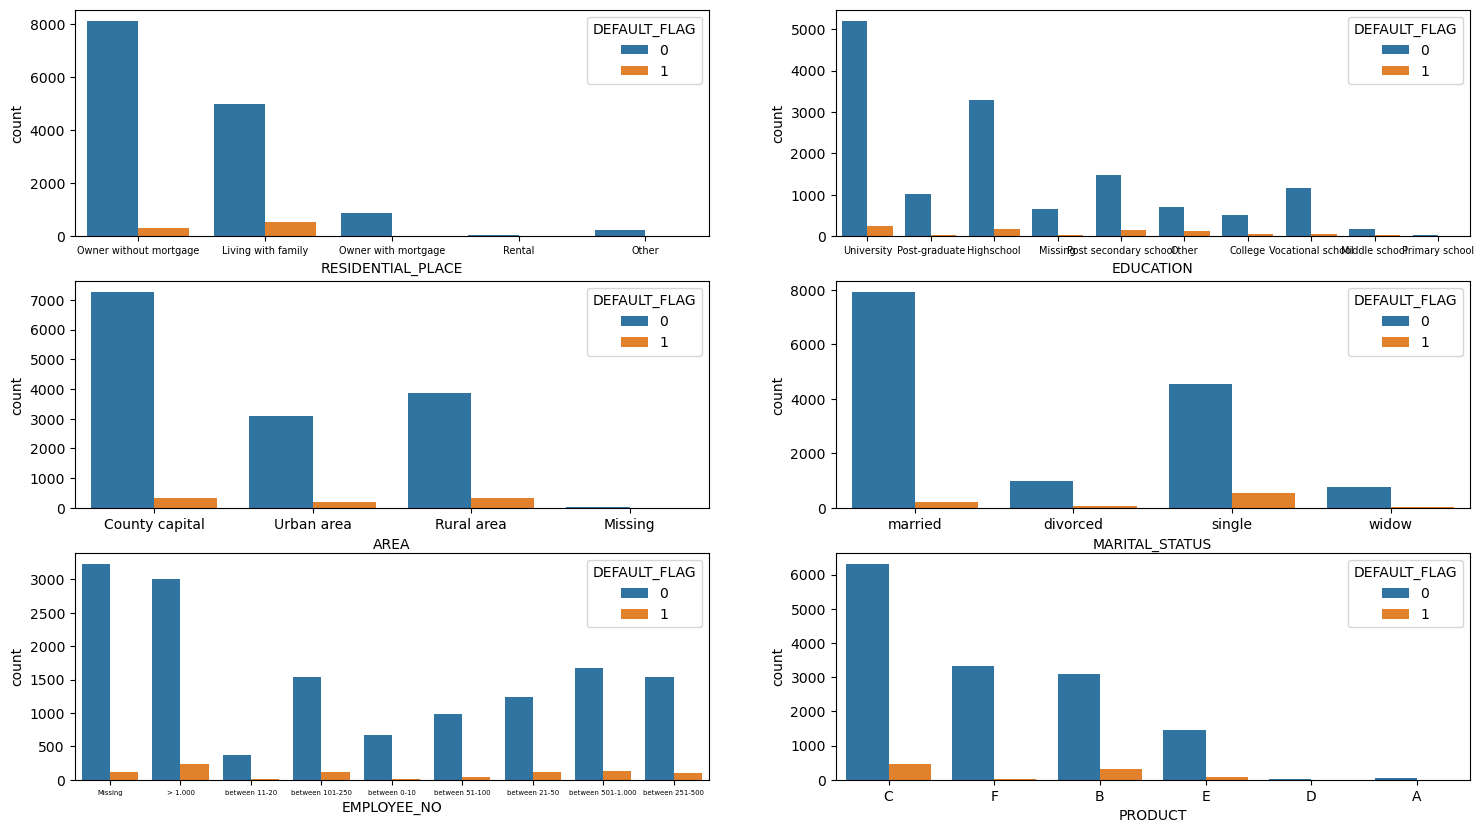

In [12]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (18, 10))
sns.countplot(x = "RESIDENTIAL_PLACE", hue = "DEFAULT_FLAG", data = df, ax = axes[0, 0])
sns.countplot(x = "EDUCATION", hue = "DEFAULT_FLAG", data = df, ax = axes[0, 1])
sns.countplot(x = "AREA", hue = "DEFAULT_FLAG", data = df, ax = axes[1, 0])
sns.countplot(x = "MARITAL_STATUS", hue = "DEFAULT_FLAG", data = df, ax = axes[1, 1])
sns.countplot(x = "EMPLOYEE_NO", hue = "DEFAULT_FLAG", data = df, ax = axes[2, 0])
sns.countplot(x = "PRODUCT", hue = "DEFAULT_FLAG", data = df, ax = axes[2, 1])

axes[0, 0].tick_params(axis = "x", labelsize = 7)
axes[0, 1].tick_params(axis = "x", labelsize = 7)
axes[2, 0].tick_params(axis = "x", labelsize = 5)
